In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime as dt
from datetime import timedelta
import yfinance as yf

In [4]:
def get_data(stocks, start, end):
    start, end = dt.now() - timedelta(days=300), dt.now()

    stock_data = yf.download(stocks, start, end)
    stock_data = stock_data['Close']

    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    stock_data['Date'] = stock_data.index.astype(int)
    stock_data = stock_data[['Date'] + stocks]

    return mean_returns, cov_matrix, stock_data

pf = ['AAPL', 'SHEL', 'JPM', 'COST']
pf_size = len(pf)
mean_returns, cov_matrix, stock_data = get_data(pf, dt.now() - timedelta(days=300), dt.now())

display(mean_returns)
display(cov_matrix)
display(stock_data.head())

[*********************100%***********************]  4 of 4 completed


Ticker
AAPL    0.001324
COST    0.001157
JPM     0.001119
SHEL   -0.000246
dtype: float64

Ticker,AAPL,COST,JPM,SHEL
Ticker,,,,
AAPL,0.000217,0.000057,0.000014,0.000005
COST,0.000057,0.000159,0.000046,-0.000007
JPM,0.000014,0.000046,0.000261,0.000037
SHEL,0.000005,-0.000007,0.000037,0.000131


Ticker,Date,AAPL,SHEL,JPM,COST
Date,,,,,
2024-05-14,1715644800000000000,186.802170,71.150726,198.155579,774.907104
2024-05-15,1715731200000000000,189.084518,70.420586,198.745605,784.011902
2024-05-16,1715817600000000000,189.204102,69.574905,199.099609,790.018738
2024-05-17,1715904000000000000,189.233994,69.749466,201.380981,792.748230
2024-05-20,1716163200000000000,190.400085,69.429428,192.324295,789.949036


In [5]:
weights = np.random.random(pf_size)
weights /= np.sum(weights)
display(weights)

array([0.20744429, 0.37328082, 0.18363609, 0.2356388 ])

In [6]:
mc_sims = 500 # number of simulations
T = 100 # time frame or steps

In [ ]:
mean_m = np.full(shape=(T, pf_size), fill_value=mean_returns)
mean_m = mean_m.T

In [10]:
poftfolio_sims = np.full(shape=(T, mc_sims), fill_value=0)
initial_portfolio = 10000

In [11]:
poftfolio_sims[:,1].shape

(100,)

In [19]:
L = np.linalg.cholesky(cov_matrix)
for m in range(mc_sims):
    Z = np.random.normal(size=(T, pf_size))
    daily_returns = mean_m + np.inner(L, Z)
    poftfolio_sims[:,m] = np.cumprod(np.inner(weights, daily_returns.T) + 1) * initial_portfolio
    # display((np.inner(weights, daily_returns.T) + 1))
    # display(np.cumprod(np.inner(weights, daily_returns.T) + 1))

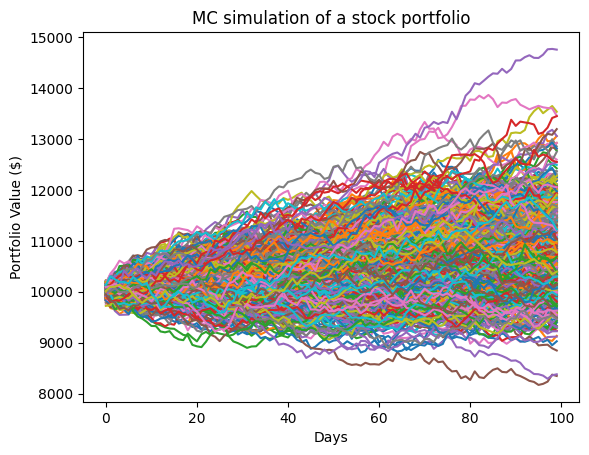

In [20]:
plt.plot(poftfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()


In [4]:
import bisect as bs
A = []
bs.bisect(A, 1)

0

array([ 0.00131719, -0.00024479,  0.00111379,  0.00115133])

array([[ 2.15626224e-04,  4.79734724e-06,  1.42810748e-05,
         5.70044248e-05],
       [ 4.79734724e-06,  1.30577597e-04,  3.65017738e-05,
        -7.08806911e-06],
       [ 1.42810748e-05,  3.65017738e-05,  2.59907822e-04,
         4.54466484e-05],
       [ 5.70044248e-05, -7.08806911e-06,  4.54466484e-05,
         1.57853357e-04]])

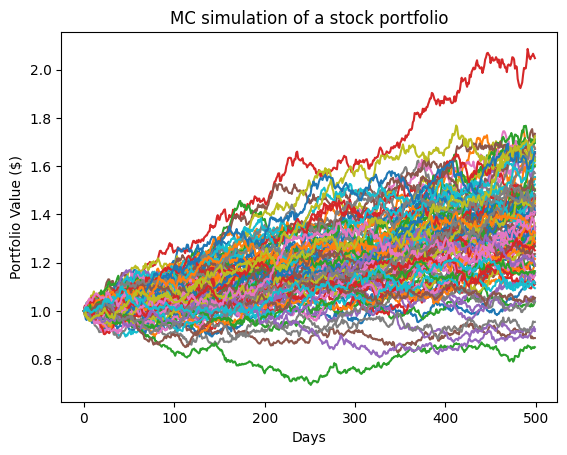

In [21]:
import equity_simulator as es
A = es.EquityPortfolio()
A.setHistoricPrices(stock_data.values)
A.setWeights(weights)
A.calculateMeanReturns()
display(A.getMeanReturns())
A.calculateCovMatrix()
display(A.getCovarianceMatrix())
A.setMontoCarloParameters(500, 100)
A.runSimulation()
simulation_data = A.returnSimulationResults()

plt.plot(simulation_data)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

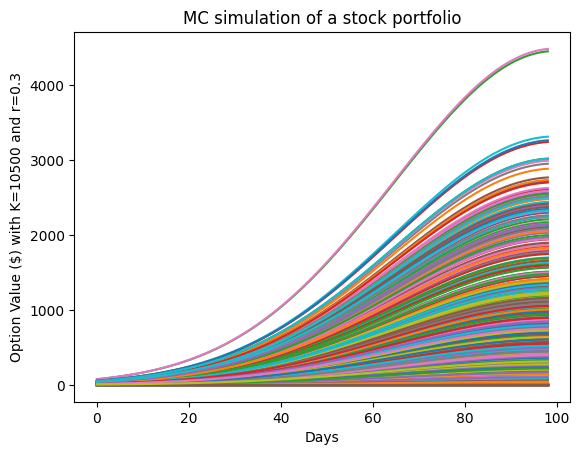

'The value of the option on portfolio with strike-price 10500 for Time-to-expiry 100 days : 16.122523380140926'

In [11]:
plt.plot(cashflow_overtime[1:])
plt.ylabel(f"Option Value ($) with K={K} and r={r}")
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

display(f"The value of the option on portfolio with strike-price {K} for Time-to-expiry {T} days : {np.mean(cashflow_overtime[1])}")

In [12]:
def var(distribution, confidence):
    try:
        return np.percentile(distribution, confidence)
    except:
        raise("Failed to Calculate VaR")

def expected_shortfall(distribution, confidence):
    try:
        value = var(distribution, confidence)
        return np.mean(distribution[distribution <= value]), value
    except:
        raise("Failed to Calulate VaR and ES")

expected_shortfall(poftfolio_sims[-1], 99)

(11327.721212121212, 13521.209999999997)

In [4]:
import random 
#Computes a moving average from a gaussian sample over n trials 
def gauss_moving_average(mu,sigma,n): 
    moving_average_list = [] 
    for i in range(n): 
        if i == 0: 
            moving_average_list.append(random.gauss(mu,sigma)) 
        else: 
            moving_average_list.append((moving_average_list[i-1]*i+random.gauss(mu,sigma))/(i+1)) 
    return moving_average_list 

#Outputs a list of guassian moving average time series 
def run_sims(mu, sigma, n, years): 
    sims = [] 
    for i in range(n): 
        sims.append(gauss_moving_average(mu,sigma,years))
    return sims 
    #Outputs the percentage of positive entries in a column of a matrix 
def percent_positive_column(matrix,column): 
    n = len(matrix) 
    percent_positive = 0 
    for i in range(n): 
        if matrix[i][column] > 0: 
            percent_positive+=(1/n) 
    return percent_positive*100 
#Runs the simulation and checks for our confidence level 
matrix = run_sims(3,10,100000, 100) 
for i in range(100): 
    conf = percent_positive_column(matrix, i) 
    print(conf) 
    if  conf >= 91.3: 
        print("Year",i+1, "has positive returns with probability", conf) 
    break

61.83499999998207


In [ ]:
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[1,2,3],[4,5,6],[7,8,9]])

A + B
np.add(A, B)